In [38]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics 

# Turning Off Warnings
warnings.filterwarnings('ignore')

In [56]:
# Read Data From File https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data#
df = pd.read_csv("cancer_data.csv")

In [57]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
df.drop(df.columns[[0,-1]], axis=1, inplace =True)

In [59]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# counts the different values available in the column
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [61]:
d_Map={'M':1,'B':-1}
df.diagnosis=df.diagnosis.map(d_Map)

In [62]:
df.diagnosis.value_counts()

-1    357
 1    212
Name: diagnosis, dtype: int64

In [63]:
# Separating target and feature variable
y=df.loc[:,'diagnosis']
x= df.iloc[:,1:]

In [64]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
# Splitting test and train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [70]:
print(y_train.mean())
print(y_test.mean())

-0.25125628140703515
-0.2631578947368421


In [71]:
model = SVC(C = 1, kernel = "linear")

# fit the model
model.fit(x_train, y_train)

# predict the result
y_pred = model.predict(x_test)

In [72]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[106,   2],
       [  6,  57]])

In [73]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9532163742690059
precision 0.9661016949152542
recall 0.9047619047619048


In [75]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1,kernel = "linear")

In [76]:
cv_results = cross_val_score(model, x_train, y_train, cv = folds, scoring = 'accuracy') 

In [77]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.9375     0.95       0.9625     0.98734177 0.93670886]
mean accuracy = 0.9548101265822785


In [78]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 0.5,0.6,0.65, 0.7, 0.9, 1,5,10,100]}

model = SVC(kernel = "linear")

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [79]:
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.6, 0.65, 0.7, 0.9, 1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [80]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048048,0.010377,0.002140,0.001078,0.1,{'C': 0.1},0.9375,0.9375,0.9750,0.987342,...,0.954774,0.021852,1,0.971698,0.968553,0.965409,0.965517,0.978056,0.969847,0.004710
1,0.378499,0.193221,0.001852,0.000903,0.5,{'C': 0.5},0.9375,0.9375,0.9625,0.987342,...,0.952261,0.020024,4,0.974843,0.974843,0.974843,0.971787,0.978056,0.974874,0.001983
2,0.454041,0.235708,0.001302,0.000178,0.6,{'C': 0.6},0.9250,0.9375,0.9625,0.987342,...,0.949749,0.022366,6,0.974843,0.974843,0.971698,0.968652,0.978056,0.973618,0.003195
3,0.458849,0.212787,0.001292,0.000155,0.65,{'C': 0.65},0.9250,0.9375,0.9625,0.987342,...,0.949749,0.022366,6,0.974843,0.974843,0.971698,0.968652,0.978056,0.973618,0.003195
4,0.692742,0.746187,0.001249,0.000107,0.7,{'C': 0.7},0.9250,0.9375,0.9625,0.987342,...,0.949749,0.022366,6,0.974843,0.977987,0.974843,0.968652,0.978056,0.974876,0.003422
5,0.994164,1.002903,0.001271,0.000171,0.9,{'C': 0.9},0.9375,0.9500,0.9625,0.987342,...,0.954774,0.018758,1,0.977987,0.977987,0.968553,0.968652,0.978056,0.974247,0.004609
6,0.747294,0.360897,0.001637,0.000372,1,{'C': 1},0.9375,0.9500,0.9625,0.987342,...,0.954774,0.018758,1,0.977987,0.977987,0.968553,0.968652,0.978056,0.974247,0.004609
7,2.635329,1.599757,0.001536,0.000133,5,{'C': 5},0.9250,0.9375,0.9500,0.987342,...,0.947236,0.021477,9,0.977987,0.974843,0.971698,0.962382,0.974922,0.972366,0.005374
8,3.772251,1.033070,0.001176,0.000198,10,{'C': 10},0.9250,0.9500,0.9500,0.974684,...,0.947236,0.016553,9,0.977987,0.981132,0.968553,0.959248,0.974922,0.972368,0.007767
9,4.968314,1.918861,0.001124,0.000157,100,{'C': 100},0.9375,0.9500,0.9500,0.987342,...,0.952261,0.018389,4,0.974843,0.971698,0.977987,0.968652,0.965517,0.971740,0.004403


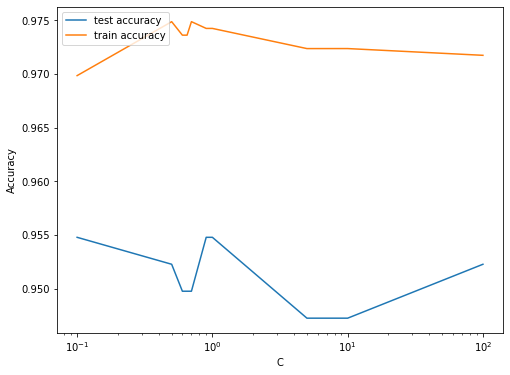

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### Best Model is at C= 0.7

In [82]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 10)
rfe = rfe.fit(x,y)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False False  True False False False False  True
 False False False False False False False False  True False  True False
 False  True  True  True False False]
[ 1  1  1 19 15  5  1  8 14 18 12  1  6  3 21 13 10 16 17 20  1  2  1  4
  9  1  1  1  7 11]


In [83]:
x_test= x_test.iloc[:,[0,1,2,6,11,20,22,25,26,27]]

In [84]:
x_train= x_train.iloc[:,[0,1,2,6,11,20,22,25,26,27]]

In [85]:
# specify range of parameters (C) as a list
params = {"C": [0.1,0.2,0.3,0.4, 0.5, 1,5,10,100]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [86]:
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [87]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008980,0.005029,0.002423,0.001176,0.1,{'C': 0.1},0.6750,0.6500,0.6375,0.544304,...,0.625628,0.044229,8,0.613208,0.619497,0.622642,0.645768,0.626959,0.625615,0.011029
1,0.004655,0.000227,0.001974,0.000676,0.2,{'C': 0.2},0.6750,0.6500,0.6375,0.544304,...,0.625628,0.044229,8,0.613208,0.625786,0.622642,0.645768,0.633229,0.628126,0.010912
2,0.004882,0.000308,0.001506,0.000149,0.3,{'C': 0.3},0.7125,0.6750,0.7000,0.531646,...,0.650754,0.065201,7,0.896226,0.877358,0.877358,0.799373,0.843260,0.858715,0.034242
3,0.008429,0.003052,0.002142,0.000458,0.4,{'C': 0.4},0.8250,0.8625,0.8375,0.721519,...,0.804020,0.050535,6,0.987421,0.987421,1.000000,0.993730,0.990596,0.991834,0.004707
4,0.006187,0.000636,0.001703,0.000253,0.5,{'C': 0.5},0.9625,0.9625,0.9375,0.860759,...,0.927136,0.038054,5,0.987421,0.987421,0.996855,0.990596,0.990596,0.990578,0.003445
5,0.006542,0.000681,0.001886,0.000440,1,{'C': 1},0.9750,0.9625,0.9375,0.936709,...,0.952261,0.014781,1,0.987421,0.987421,1.000000,0.990596,0.996865,0.992461,0.005109
6,0.005959,0.000760,0.001476,0.000158,5,{'C': 5},0.9625,0.9500,0.9375,0.924051,...,0.947236,0.014749,2,0.996855,0.996855,1.000000,0.996865,0.996865,0.997488,0.001256
7,0.006310,0.000946,0.002082,0.000709,10,{'C': 10},0.9625,0.9500,0.9375,0.924051,...,0.947236,0.014749,2,0.996855,1.000000,1.000000,0.996865,0.996865,0.998117,0.001537
8,0.006190,0.000813,0.001535,0.000277,100,{'C': 100},0.9500,0.9375,0.9375,0.924051,...,0.942211,0.012826,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


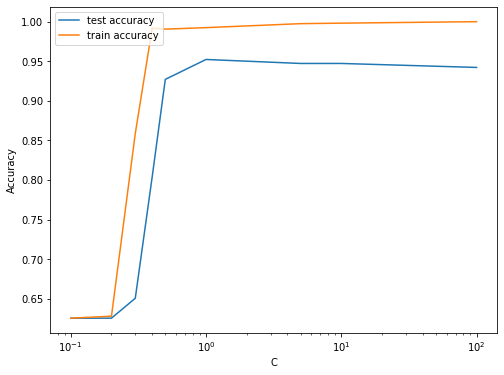

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### Best model is at C=1